<a href="https://www.elcorteingles.es/"><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Logo_Corte_Ingl%C3%A9s.svg/1200px-Logo_Corte_Ingl%C3%A9s.svg.png" width = 400> </a>
<h1 align=center><font size = 10><font color="green">EVALUATE LOCATION FOR A NEW CENTER OF "EL CORTE INGLES"</font></h1>   

<h2 align=left><font size = 5><font color="green">TABLE OF CONTENTS</font></h2>


* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Analysis](#analysis)
* [Conclusion](#conclusion)
    
   

<h2 align=left><font size = 6><font color="green">Introduction: Business Problem</font></h2> <a name="introduction"></a>

El Corte Inglés is ones of the biggest Groups in Spain.  In this project we have a new located in Huelva. Huelva is a city in Andalucía.We want to find out wich activity will be sucess in the area. 


<h2 align=left><font size = 5><font color="green">Preparing Jupyter Notebooks</font></h2> 

In this section, we will install and import all the modules we need in our analysis

In [1]:
!conda install -c anaconda beautifulsoup4 --yes
!conda install -c conda-forge geocoder --yes
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
# install seaborn
!conda install -c anaconda seaborn --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    soupsieve-1.9.3            |           py36_0          60 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    certifi-2019.9.11          |           py36_0         154 KB  anaconda
    beautifulsoup4-4.8.0       |           py36_0         147 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.4 MB

The following NEW packages will be INSTALLED:

    soupsieve:      1.9.3-py36_0      a

In [2]:
#from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import geocoder
import folium # map rendering library

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
geolocator = Nominatim(user_agent="ny_explorer")
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs


<h2 align=left><font size = 6><font color="green">Data</font></h2> <a name="data"></a>

<h3 align=left><font size = 5><font color="green">El corte ingles's Centers</font></h3> 

In [3]:
data=[]
for i in range(1,9):
    web="https://www.elcorteingles.es/centroscomerciales/es/eci/centros?page={}"
    url=web.format(i)
    website_url = requests.get(url).text
    soupECI = BeautifulSoup(website_url, 'html.parser')
    table = soupECI.find('article')
    rows = table.find_all('li', attrs={'class': 'row'})
    for row in rows:
        cols = row.find_all('span')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols if ele])

In [4]:
dfn=pd.DataFrame(data=data)

if dfn.shape[1]==4:
    dfn.drop(0, axis=1, inplace=True)
dfn.columns=["Centro", "Direccion","Telefono"]
dfn.head(3)

,Centro,Direccion,Telefono
0,Centro Centro Comercial Bahía de Algeciras,"Dirección Paseo Juan Pérez Arriete s/n, Algeci...",Teléfono 956 582 800
1,Centro Centro Comercial El Ejido,"Dirección Paseo de Pedro Ponce, s/n, 04700 Al...",Teléfono 950 542 000
2,Centro Centro Comercial Bahía de Cádiz,"Dirección Avda. de las Cortes de Cádiz,1,11012...",Teléfono 956 297 100


In [5]:
#Clean Data
dfn.replace('Centro Centro Comercial ', '', regex=True, inplace=True)
dfn.replace('Dirección ', '', regex=True, inplace=True) 
dfn.replace('Teléfono ', '', regex=True, inplace=True)
dfn["Latitude"]=""
dfn["Longitude"]=""
dfn["Dir_sp"]=""
dfn["Region"]=""

In [6]:
def getRegion(Adress):
    Region=""
    if Adress.find("Sevilla")>=0: Region="Andalucía"
    if Adress.find("Córdoba")>=0: Region="Andalucía"
    if Adress.find("Huelva")>=0: Region="Andalucía"
    if Adress.find("Cádiz")>=0: Region="Andalucía"
    if Adress.find("Granada")>=0: Region="Andalucía"
    if Adress.find("Málaga")>=0: Region="Andalucía"
    if Adress.find("Aleria")>=0: Region="Andalucía"
    if Adress.find("Jaén")>=0: Region="Andalucía"
    if Region=="": 
        a=pd.DataFrame( data=Adress.split(","))
        Lin=a.size-1
        Region=a.iloc[Lin,0] 
    return(Region)

In [7]:
for i,row in dfn.iterrows():
    Adress=dfn.iloc[i,1]
    #print(Adress)
    location = geolocator.geocode(Adress)
    if location!=None:
        latitude = location.latitude
        longitude= location.longitude
        dfn.iloc[i,3]=latitude
        dfn.iloc[i,4]=longitude
        dfn.at[i,"Dir_sp"]=Adress.split(",")
        dfn.at[i,"Region"]=getRegion(dfn.at[i,"Direccion"])
    else:
        dfn.iloc[i,3]=None
        dfn.iloc[i,4]=None
    


In [8]:
dfn.dropna(subset=['Latitude', 'Latitude'],inplace=True)
dfn.reset_index(inplace = True)
dfn.drop("index", axis=1, inplace=True)

In [9]:
dfn.head(8)

,Centro,Direccion,Telefono,Latitude,Longitude,Dir_sp,Region
0,El Ejido,"Paseo de Pedro Ponce, s/n, 04700 Almería, And...",950 542 000,36.7733,-2.80375,"[Paseo de Pedro Ponce, s/n, 04700 Almería, ...",Andalucía
1,Bahía de Cádiz,"Avda. de las Cortes de Cádiz,1,11012 Cádiz, An...",956 297 100,36.521,-6.2771,"[Avda. de las Cortes de Cádiz, 1, 11012 Cádiz,...",Andalucía
2,Ronda de los Tejares,"Av. Ronda de los Tejares, 30, 14008 Córdoba, E...",957 222 881,37.887,-4.78359,"[Av. Ronda de los Tejares, 30, 14008 Córdoba...",Andalucía
3,Ronda de Córdoba,"Ctra. Sta. María de Trassierra, S/N, Córdoba, ...",957 224 949,37.8959,-4.81079,"[Ctra. Sta. María de Trassierra, S/N, Córdob...",Andalucía
4,Arabial,"Arabial, 97, 18003 Granada, Andalucía",958 217 600,37.1777,-3.61265,"[Arabial, 97, 18003 Granada, Andalucía]",Andalucía
5,Plaça de Catalunya,"Plaça de Catalunya, 14 Barcelona",933 063 800.,41.3877,2.17103,"[Plaça de Catalunya, 14 Barcelona]",14 Barcelona
6,Diagonal,"Avenida Diagonal, 617 08028 Barcelona",933 667 100,41.3891,2.13028,"[Avenida Diagonal, 617 08028 Barcelona]",617 08028 Barcelona
7,Francesc Macià,"Avinguda Diagonal, 471 08036 Barcelona",934 934 800,41.391,2.13911,"[Avinguda Diagonal, 471 08036 Barcelona]",471 08036 Barcelona


In [10]:
#dfn.to_csv('ECI_OK.csv', header=True, index=False)
#dfn=pd.read_csv('ECI_OK.csv')

In [11]:
location = geolocator.geocode('Madrid')
latitude = location.latitude
longitude= location.longitude

In [12]:
# create map
map_eci = folium.Map(location=[latitude, longitude], zoom_start=5)

for lat, lon, poi, cluster in zip(dfn['Latitude'], dfn['Longitude'],dfn['Centro'], dfn['Direccion']):
    label = folium.Popup(str(poi) + ' \\n ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color="Green",
        fill=True,
        fill_color="Green",
        fill_opacity=0.7).add_to(map_eci)
       
map_eci

<h3 align=left><font size = 5><font color="green">El corte ingles's Andalusian Centers</font></h3> 

In [13]:
dfn_AN=dfn[dfn["Region"]=="Andalucía"]


In [14]:
#dfn_AN.to_csv('ECI_AN.csv', header=True, index=False)
#dfn_AN=pd.read_csv('ECI_AN.csv')

In [15]:
location = geolocator.geocode('Sevilla')
latitude = location.latitude
longitude= location.longitude

In [16]:
# create map
map_eci = folium.Map(location=[latitude, longitude], zoom_start=7)

for lat, lon, poi, cluster in zip(dfn_AN['Latitude'], dfn_AN['Longitude'],dfn_AN['Centro'], dfn_AN['Direccion']):
    label = folium.Popup(str(poi) + ' \\n ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color="Green",
        fill=True,
        fill_color="Green",
        fill_opacity=0.7).add_to(map_eci)
       
map_eci

<h3 align=left><font size = 5><font color="green">Venues around ECI Centers</font></h3> 

In [17]:
CLIENT_ID = 'YPCC45XDJWEFJL5DD5BRWI0XGZCG22QVV4KJFXQZ54QWONRH' # your Foursquare ID
CLIENT_SECRET = 'X1AOOW5ZS14PNG21WFZLNUJ0TMBJBQB450U00FYOLHTCH1NF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT=300

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name + " " + str(lat) + ", " + str(lng))
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
       
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Center', 
                  'Center Latitude', 
                  'Center Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
ECI_venues = getNearbyVenues(names=dfn['Centro'],
                                   latitudes=dfn['Latitude'],
                                   longitudes=dfn['Longitude']
                                  )
    
ECI_venues.head()

El Ejido 36.7733339, -2.8037499
Bahía de Cádiz 36.5210158, -6.2771049
Ronda de los Tejares 37.8870044, -4.7835921
Ronda de Córdoba 37.8959365, -4.8107855
Arabial 37.177738, -3.6126498
Plaça de Catalunya 41.3877469, 2.1710264
 Diagonal 41.3890744, 2.1302804
Francesc Macià 41.390988469863, 2.13911429452055
Can Dragó 41.4392884, 2.1825001
Girocentre 42.2635405, 3.1760233
Jaén 37.7784354, -3.7852137
Jerez 36.705084, -6.1171038
Málaga 36.71750615, -4.42828106228994
Bahía Málaga 36.709756, -4.4616224
Plaza del Duque de la Victoria 37.39305835, -5.99585614927501
Ramón y Cajal 43.3540954, -8.4032881
Compostela 42.8627104, -8.5420371
Gijón 43.5243826, -5.6777301
Uría 43.3630808, -5.8499189
Salesas 43.366551, -5.8495642
Independencia 41.6475847, -0.8858161
de Santander 43.4396242, -3.8435586
Ego Gain 43.1860102, -2.4704649
La Paz 42.844651, -2.6684064
Caba 38.9940104, -1.8598011
Avenida de España, 30 38.9827569, -1.8537621
Talavera de la Reina 39.9628487, -4.8251088
Centro El Corte Inglés Cartag

,Center,Center Latitude,Center Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,El Ejido,36.773334,-2.80375,El Corte Inglés,36.772692,-2.806002,Shopping Mall
1,El Ejido,36.773334,-2.80375,La Venia,36.773163,-2.801375,Café
2,El Ejido,36.773334,-2.80375,Burger King,36.774772,-2.804316,Fast Food Restaurant
3,El Ejido,36.773334,-2.80375,Wok slowly,36.774030,-2.803892,Chinese Restaurant
4,El Ejido,36.773334,-2.80375,Cafeteria El Corte Ingles,36.772787,-2.805774,Snack Place


 <h2 align=left><font size = 6><font color="green">Analysis</font></h2> <a name="analysis"></a>

In [21]:

#ECI_venues=pd.read_csv('ECI_Venues.csv')
#ECI_venues.head()
#ECI_venues.to_csv('ECI_Venues.csv', header=True, index=False)

In [22]:
RES=ECI_venues[["Venue Category","Center"]].groupby(["Venue Category","Center"]).size().to_frame()
RES.reset_index( inplace=True)
RES.head()

,Venue Category,Center,0
0,Accessories Store,Plaça de Catalunya,1
1,Accessories Store,Preciados-Callao,1
2,American Restaurant,Avenida de Francia,2
3,American Restaurant,Caba,1
4,American Restaurant,Independencia,1


In [23]:
Venues_RES=RES.groupby('Venue Category', as_index=False).agg({"Center": "count",0:"sum"})
Venues_RES.columns=["Categories","TotalCenters","TotalVenues"]
Venues_RES.sort_values(by="TotalCenters",ascending=False,inplace=True)
Venues_RES.set_index("Categories",inplace=True)
Venues_RES.head()

,TotalCenters,TotalVenues
Categories,,
Restaurant,40,148
Spanish Restaurant,36,154
Coffee Shop,36,105
Café,35,110
Tapas Restaurant,34,139


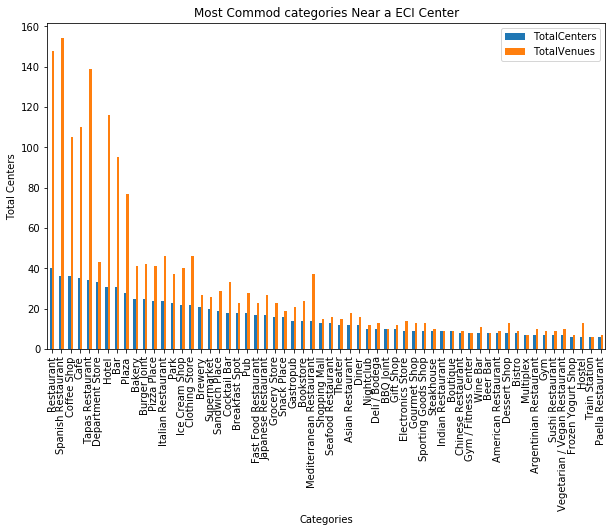

In [24]:
Venues_RES[Venues_RES["TotalCenters"]>5].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Categories') # add to x-label to the plot
plt.ylabel('Total Centers') # add y-label to the plot
plt.title("Most Commod categories Near a ECI Center") # add title to the plot

plt.show()

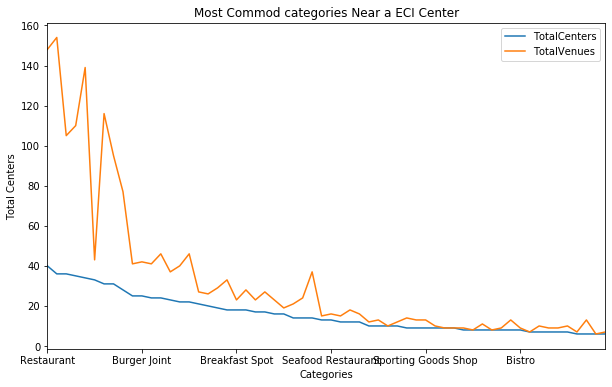

In [25]:
Venues_RES[Venues_RES["TotalCenters"]>5].plot(kind='line', figsize=(10, 6))

plt.xlabel('Categories') # add to x-label to the plot
plt.ylabel('Total Centers') # add y-label to the plot
plt.title("Most Commod categories Near a ECI Center") # add title to the plot

plt.show()

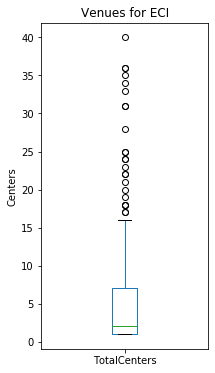

In [27]:
Venues_RES["TotalCenters"].plot(kind='box', figsize=(3, 6))

plt.title('Venues for ECI')
plt.ylabel('Centers')

plt.show()

Looking most popular categories. We eill use then to made a  segmentat

<h3 align=left><font size = 5><font color="green">Venues around ECI Andalusian Centers</font></h3> 

In [28]:
ECI_venues_AN=ECI_venues[ ECI_venues["Center"].isin(dfn_AN['Centro'])]
ECI_venues_AN.head()

,Center,Center Latitude,Center Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
8,Bahía de Cádiz,36.521016,-6.277105,El Corte Inglés,36.521855,-6.277335,Department Store
9,Bahía de Cádiz,36.521016,-6.277105,Viento De Levante,36.519542,-6.273961,Seafood Restaurant
10,Bahía de Cádiz,36.521016,-6.277105,Mercadona,36.519810,-6.278180,Supermarket
11,Bahía de Cádiz,36.521016,-6.277105,100 Montaditos,36.521150,-6.276332,Sandwich Place
12,Bahía de Cádiz,36.521016,-6.277105,Cinesur Bahia de Cadiz,36.519173,-6.278118,Movie Theater


In [29]:
RES_AN=ECI_venues_AN[["Venue Category","Center"]].groupby(["Venue Category","Center"]).size().to_frame()
RES_AN.reset_index( inplace=True)
RES_AN.head()

,Venue Category,Center,0
0,American Restaurant,Ronda de los Tejares,1
1,Art Gallery,Plaza del Duque de la Victoria,2
2,Art Museum,Málaga,1
3,Art Museum,Plaza del Duque de la Victoria,1
4,Asian Restaurant,Málaga,1


In [30]:
Venues_RES_AN=RES_AN.groupby('Venue Category', as_index=False).agg({"Center": "count",0:"sum"})
Venues_RES_AN.columns=["Categories","TotalCenters","TotalVenues"]
Venues_RES_AN.sort_values(by="TotalCenters",ascending=False,inplace=True)
Venues_RES_AN.set_index("Categories",inplace=True)
Venues_RES_AN.head()

,TotalCenters,TotalVenues
Categories,,
Department Store,8,12
Coffee Shop,7,12
Tapas Restaurant,6,37
Spanish Restaurant,5,18
Café,5,15


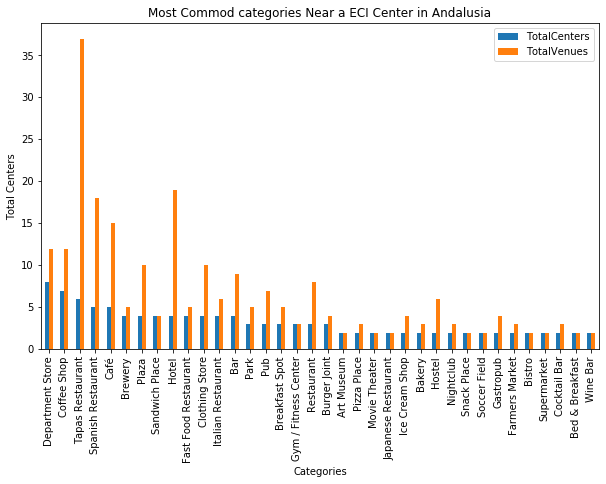

In [31]:
Venues_RES_AN[Venues_RES_AN["TotalCenters"]>1].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Categories') # add to x-label to the plot
plt.ylabel('Total Centers') # add y-label to the plot
plt.title('Most Commod categories Near a ECI Center in Andalusia') # add title to the plot

plt.show()

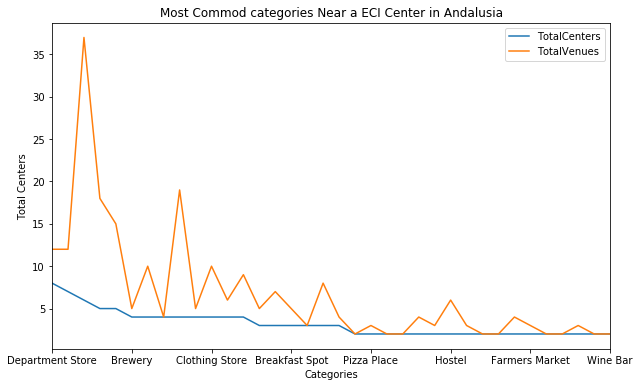

In [32]:
Venues_RES_AN[Venues_RES_AN["TotalCenters"]>1].plot(kind='line', figsize=(10, 6))

plt.xlabel('Categories') # add to x-label to the plot
plt.ylabel('Total Centers') # add y-label to the plot
plt.title('Most Commod categories Near a ECI Center in Andalusia') # add title to the plot

plt.show()

<h3 align=left><font size = 5><font color="green">ECI Nacional Segmentation</font></h3> 

In [87]:
ECI_Box=pd.get_dummies(RES[["Venue Category","Center"]],columns=['Venue Category'])
ECI_Box=ECI_Box.groupby("Center").mean()
ECI_Box.reset_index( inplace=True)
ColTb=ECI_Box.columns
ColTb = [word.replace('Venue Category_','') for word in ColTb]
ECI_Box.columns=ColTb


X = ECI_Box.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)

num_clusters = 5

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

ECI_Box["Labels"] = labels

SEG_Nat=ECI_Box.groupby('Labels').mean()

SEG_Nat

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Accessories Store,American Restaurant,Amphitheater,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,...,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Women's Store
Labels,,,,,,,,,,,,,,,,,,,,,
0,0.000393,0.003616,0.000363,0.000393,0.000000,0.004120,0.001785,0.001344,0.005392,0.004967,...,0.000925,0.000868,0.000429,0.002934,0.000439,0.000000,0.00603,0.000000,0.00051,0.0014
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022222,0.000000,...,0.000000,0.000000,0.000000,0.022222,0.000000,0.000000,0.00000,0.000000,0.00000,0.0000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.00000,0.017857,0.00000,0.0000
3,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.03125,0.0000
4,0.019231,0.000000,0.000000,0.000000,0.019231,0.019231,0.000000,0.019231,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.019231,0.000000,0.000000,0.00000,0.000000,0.00000,0.0000


<h3 align=left><font size = 5><font color="green">ECI Andalusia Segmentation</font></h3> 

In [89]:
ECI_Box_AN=pd.get_dummies(RES_AN[["Venue Category","Center"]],columns=['Venue Category'])
ECI_Box_AN=ECI_Box_AN.groupby("Center").mean()
ECI_Box_AN.reset_index( inplace=True)
ColTb=ECI_Box_AN.columns
ColTb = [word.replace('Venue Category_','') for word in ColTb]
ECI_Box_AN.columns=ColTb

X = ECI_Box_AN.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)

num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

ECI_Box_AN["Labels"] = labels
SEG_Nat_AN=ECI_Box_AN.groupby('Labels').mean()
SEG_Nat_AN

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,...,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Toy / Game Store,Train Station,Wine Bar,Winery,Women's Store
Labels,,,,,,,,,,,,,,,,,,,,,
0,0.005495,0.000,0.000000,0.000000,0.000000,0.011988,0.005495,0.000000,0.005495,0.000,...,0.059777,0.020408,0.005495,0.005495,0.047619,0.000000,0.009524,0.005495,0.000000,0.000000
1,0.000000,0.025,0.025000,0.000000,0.025000,0.025000,0.025000,0.000000,0.000000,0.025,...,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000
2,0.000000,0.000,0.027027,0.027027,0.027027,0.027027,0.000000,0.027027,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.027027,0.000000,0.000000,0.027027,0.027027


<h3 align=left><font size = 5><font color="green">My new Location</font></h3> 

In [92]:
LatitudeHU=37.277309
LongitudeHU=-6.926043
New_ECI=pd.DataFrame(data=[('My new Location',LatitudeHU,LongitudeHU)],columns=["Name","Latitude","Longitude"],index=[0])
# create map
map_eci_HU = folium.Map(location=[LatitudeHU, LongitudeHU], zoom_start=15,tiles="OpenStreetMap")
label = folium.Popup("New Center Location", parse_html=True)
folium.CircleMarker(
        [LatitudeHU, LongitudeHU],
        radius=15,
        popup=label,
        color="Green",
        fill=True,
        fill_color="Green",
        fill_opacity=0.7).add_to(map_eci_HU)
       
map_eci_HU

In [93]:
ECI_venuesHU = getNearbyVenues(names=New_ECI["Name"],
                                   latitudes=New_ECI["Latitude"],
                                   longitudes=New_ECI["Longitude"]
                                  )
    
ECI_venuesHU

My new Location 37.277309, -6.926043


,Center,Center Latitude,Center Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,My new Location,37.277309,-6.926043,AC Hotel Huelva,37.275493,-6.925579,Hotel
1,My new Location,37.277309,-6.926043,Mercadona,37.279056,-6.930292,Grocery Store
2,My new Location,37.277309,-6.926043,Zara Holea,37.274542,-6.925376,Women's Store
3,My new Location,37.277309,-6.926043,El Rincón del Amigo,37.274474,-6.926586,Tapas Restaurant


In [94]:
RES_HU=ECI_venuesHU[["Venue Category"]].groupby(["Venue Category"]).size().to_frame()
RES_HU.reset_index( inplace=True)
RES_HU.head()

,Venue Category,0
0,Grocery Store,1
1,Hotel,1
2,Tapas Restaurant,1
3,Women's Store,1


<h3 align=left><font size = 5><font color="green">My new Location Spanish Segment</font></h3> 

In [101]:
ValueSEG=[0,0,0,0,0]

for i ,row in RES_HU.iterrows():
    NomVen=RES_HU.iloc[i,0]
    ArrVen=np.array(SEG_Nat[NomVen]*100000).astype(int)
    ValueSEG=ValueSEG+ArrVen #SEG_Nat[NomVen]
    print(ArrVen)
    
MaxVal=(max(ValueSEG))
Segment=np.where(ValueSEG==MaxVal)

print(Segment)


[1002 2222    0 3125    0]
[2443 2222 1785    0 1923]
[3937 2222 1785 3125 1923]
[139   0   0   0   0]
(array([0]),)


<h3 align=left><font size = 5><font color="green">My new Location Andalusian Segment</font></h3> 

In [102]:
ValueSEG=[0,0,0]

for i ,row in RES_HU.iterrows():
    NomVen=RES_HU.iloc[i,0]
    ArrVen=np.array(SEG_Nat_AN[NomVen]*100000).astype(int)
    ValueSEG=ValueSEG+ArrVen #SEG_Nat[NomVen]
    print(ArrVen)
    
MaxVal=(max(ValueSEG))
Segment=np.where(ValueSEG==MaxVal)

print(Segment)


[   0    0 2702]
[1198 2500 2702]
[5977 2500    0]
[   0    0 2702]
(array([2]),)


<h3 align=left><font size = 5><font color="green">Activities in each Segment</font></h3> 

In [169]:
Activities=[]
n=0
#Spanish Activities
SP_SEG=pd.DataFrame(data=SEG_Nat)
for i in range(0,SP_SEG.shape [1]):
    if SP_SEG.iloc[0,i]!=0:
        Cat=SP_SEG.columns[i]
        Activities.append((Cat,1))
#Andalusian Activities
SP_SEG_AN=pd.DataFrame(data=SEG_Nat_AN)
for i in range(0,SP_SEG_AN.shape [1]):
    if SP_SEG_AN.iloc[0,i]!=0:
        Cat=SP_SEG_AN.columns[i]
        Activities.append((Cat,2))
#LOcal Activities

for i in range(0,RES_HU.shape[0]):
    Cat=RES_HU.iloc[i,0]
    Activities.append((Cat,3))
RESULT=pd.DataFrame(data=Activities)


<h2 align=left><font size = 6><font color="green">Conclusion</font></h2> <a name="Conclusion"></a>

In [170]:
RESULT.columns=("Category","Value")
RESULT

,Category,Value
0,Accessories Store,1
1,American Restaurant,1
2,Amphitheater,1
3,Arcade,1
4,Argentinian Restaurant,1
...,...,...
242,Wine Bar,2
243,Grocery Store,3
244,Hotel,3
245,Tapas Restaurant,3


In [185]:
RESULT["Region"]=1
DefRes=RESULT.groupby("Category").sum()
DefRes.sort_values(by="Value",ascending=False,inplace=True)
DefRes=DefRes[DefRes["Region"]>1]
DefRes


,Value,Region
Category,,
Hotel,6,3
Tapas Restaurant,6,3
Women's Store,4,2
Grocery Store,4,2
Market,3,2
Japanese Restaurant,3,2
American Restaurant,3,2
Ice Cream Shop,3,2
Hotel Bar,3,2


In [186]:
GrpfRES=DefRes["Value"].head(10)

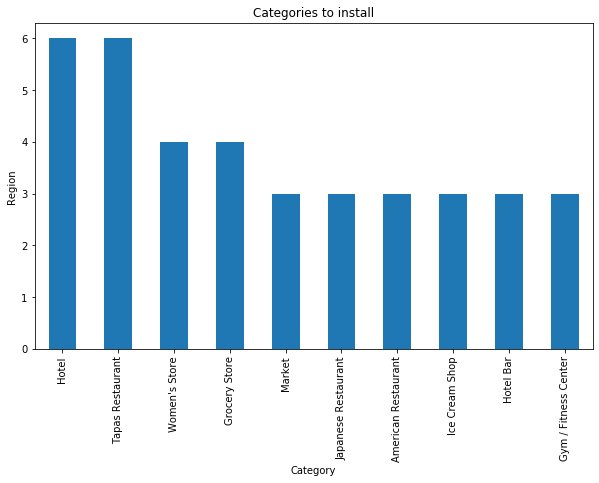

In [187]:
GrpfRES.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Category') # add to x-label to the plot
plt.ylabel('Region') # add y-label to the plot
plt.title('Categories to install') # add title to the plot

plt.show()